# Visualize Covid19 Data in Python

## data source

The data is from [European Centre for Disease Prevention and Control](https://www.ecdc.europa.eu/en/publications-data/download-todays-data-geographic-distribution-covid-19-cases-worldwide)

![covid image](https://www.jmu.edu/_images/news/2020/Covid-19Dashboard-06.png)

In [1]:
%matplotlib inline
import pandas

## a quick view of the data

In [2]:
df = pandas.read_excel('s3://wei-ia241-2021spring/COVID-19-geographic-disbtribution-worldwide-2020-12-14.xlsx')
df[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
0,2020-12-14,14,12,2020,746,6,Afghanistan,AF,AFG,38041757.0,Asia,9.013779
1,2020-12-13,13,12,2020,298,9,Afghanistan,AF,AFG,38041757.0,Asia,7.052776
2,2020-12-12,12,12,2020,113,11,Afghanistan,AF,AFG,38041757.0,Asia,6.868768
3,2020-12-11,11,12,2020,63,10,Afghanistan,AF,AFG,38041757.0,Asia,7.134266
4,2020-12-10,10,12,2020,202,16,Afghanistan,AF,AFG,38041757.0,Asia,6.968658
5,2020-12-09,9,12,2020,135,13,Afghanistan,AF,AFG,38041757.0,Asia,6.963401
6,2020-12-08,8,12,2020,200,6,Afghanistan,AF,AFG,38041757.0,Asia,7.094835
7,2020-12-07,7,12,2020,210,26,Afghanistan,AF,AFG,38041757.0,Asia,7.215755
8,2020-12-06,6,12,2020,234,10,Afghanistan,AF,AFG,38041757.0,Asia,7.326160
9,2020-12-05,5,12,2020,235,18,Afghanistan,AF,AFG,38041757.0,Asia,7.115865


## trend of the number of cases

In [6]:
sum_cases_per_day=df.groupby('dateRep').sum()['cases']

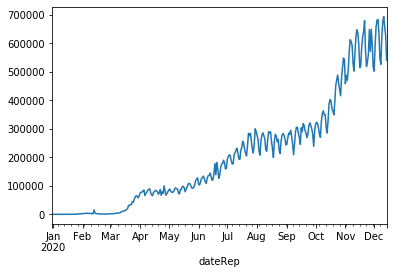

In [7]:
sum_cases_per_day.plot()

## the top 10 countries with the highest deaths

In [10]:
sum_death_per_country=df.groupby('countriesAndTerritories').sum()['deaths']

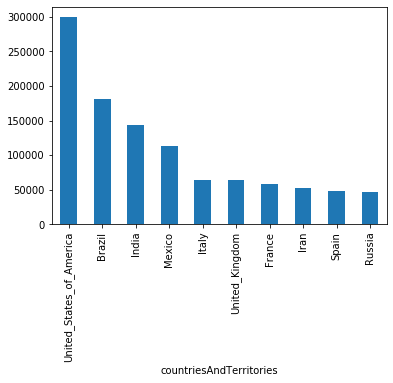

In [12]:
sum_death_per_country.nlargest(10).plot.bar()

## list of all countries

In [13]:
pandas.unique(df['countriesAndTerritories'])

array(['Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola',
       'Anguilla', 'Antigua_and_Barbuda', 'Argentina', 'Armenia', 'Aruba',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin',
       'Bermuda', 'Bhutan', 'Bolivia',
       'Bonaire, Saint Eustatius and Saba', 'Bosnia_and_Herzegovina',
       'Botswana', 'Brazil', 'British_Virgin_Islands',
       'Brunei_Darussalam', 'Bulgaria', 'Burkina_Faso', 'Burundi',
       'Cambodia', 'Cameroon', 'Canada', 'Cape_Verde',
       'Cases_on_an_international_conveyance_Japan', 'Cayman_Islands',
       'Central_African_Republic', 'Chad', 'Chile', 'China', 'Colombia',
       'Comoros', 'Congo', 'Costa_Rica', 'Cote_dIvoire', 'Croatia',
       'Cuba', 'CuraÃ§ao', 'Cyprus', 'Czechia',
       'Democratic_Republic_of_the_Congo', 'Denmark', 'Djibouti',
       'Dominica', 'Dominican_Republic', 'Ecuador', 'Egypt',
       'El_Salvador', 'Equatorial_Guinea', 'Er

## The USA data

In [15]:
usa_data = df.loc[ df['countriesAndTerritories']=='United_States_of_America'  ]

usa_data[:10]

,dateRep,day,month,year,cases,deaths,countriesAndTerritories,geoId,countryterritoryCode,popData2019,continentExp,Cumulative_number_for_14_days_of_COVID-19_cases_per_100000
59001,2020-12-14,14,12,2020,189723,1340,United_States_of_America,US,USA,329064917.0,America,873.211592
59002,2020-12-13,13,12,2020,216017,2315,United_States_of_America,US,USA,329064917.0,America,857.089241
59003,2020-12-12,12,12,2020,234633,3343,United_States_of_America,US,USA,329064917.0,America,838.514183
59004,2020-12-11,11,12,2020,224680,2748,United_States_of_America,US,USA,329064917.0,America,830.394205
59005,2020-12-10,10,12,2020,220025,3124,United_States_of_America,US,USA,329064917.0,America,794.356027
59006,2020-12-09,9,12,2020,217344,2564,United_States_of_America,US,USA,329064917.0,America,784.195114
59007,2020-12-08,8,12,2020,197334,1433,United_States_of_America,US,USA,329064917.0,America,769.896719
59008,2020-12-07,7,12,2020,173432,1111,United_States_of_America,US,USA,329064917.0,America,762.794473
59009,2020-12-06,6,12,2020,211933,2203,United_States_of_America,US,USA,329064917.0,America,757.944062
59010,2020-12-05,5,12,2020,231930,2680,United_States_of_America,US,USA,329064917.0,America,746.870564


## how the # death is related to the # case in the USA

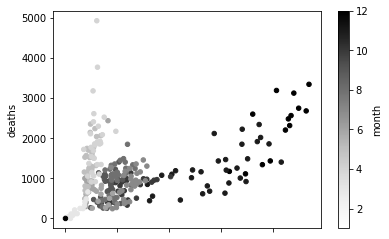

In [19]:
usa_data.plot.scatter(x='cases',y='deaths',c='month')